<h1 style="color:black; font-size:28px; font-weight:bold;">Introduction</h1>

Predicting house prices is a classic problem in data science and machine learning, with significant real-world applications in real estate, urban planning, and finance. The **California Housing dataset**, widely used for regression tasks, provides information on housing prices across various districts in California along with socio-economic and geographical features such as median income, average occupancy, and proximity to key areas.

Accurate price prediction models are valuable because they help stakeholders — from homebuyers and sellers to policymakers and investors — make informed decisions. Understanding the factors that drive housing prices also sheds light on broader economic and demographic patterns.

## Objective

This project aims to:

- **Explore and analyze** the California Housing dataset to identify key factors influencing house prices  
- **Build and evaluate predictive models** (e.g., Random Forest, Linear Regression) to estimate housing values  
- **Visualize feature relationships** and assess the importance of socio-economic variables  
- **Provide insights** into how income, location, and housing characteristics contribute to pricing trends  

By combining exploratory data analysis with predictive modeling, the project seeks to capture both the **statistical patterns** and **practical insights** that drive California’s housing market.


<h1 style="color:black; font-size:24px; font-weight:bold;">Loading the Dataset</h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

df.head()

Shape of dataset: (20640, 9)

Column names:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<h1 style="color:black; font-size:24px; font-weight:bold;">Data Preprocessing</h1>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<p><strong style="font-size:18px;">Add New Features</strong></p>

<p style="font-size:14px; margin-left: 20px;">
  <strong>Rooms_per_Household:</strong> This feature represents the average number of rooms available per household, giving insight into housing density.<br>
  <strong>Bedrooms_per_Room:</strong> This ratio measures the proportion of bedrooms to total rooms, indicating the space allocation within homes.<br>
  <strong>Population_per_Household:</strong> This calculates the average number of people living in each household, reflecting occupancy rates.
</p>


In [6]:
df['Rooms_per_Household'] = df['AveRooms'] / df['AveOccup']
df['Bedrooms_per_Room'] = df['AveBedrms'] / df['AveRooms']
df['Population_per_Household'] = df['Population'] / df['AveOccup']

In [7]:
y = np.log(df['MedHouseVal'])

In [8]:
feature_cols = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
    'Population', 'AveOccup', 'Latitude', 'Longitude',
    'Rooms_per_Household', 'Bedrooms_per_Room', 'Population_per_Household'
]

X = df[feature_cols]

<h1 style="color:black; font-size:28px; font-weight:bold;">Exploratory Data Analysis</h1>


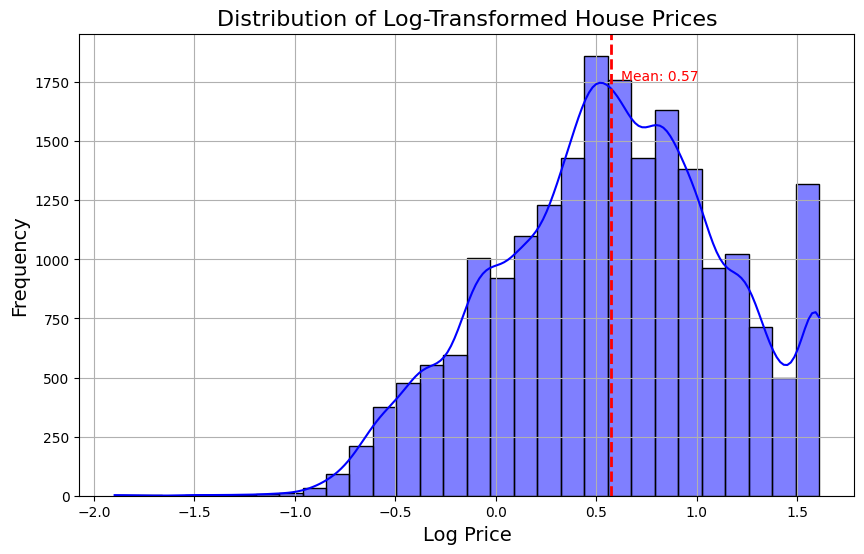

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(y, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Log-Transformed House Prices', fontsize=16)
plt.xlabel('Log Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

mean_log_price = y.mean()
plt.axvline(mean_log_price, color='red', linestyle='--', linewidth=2)
plt.text(mean_log_price + 0.05, plt.ylim()[1]*0.9, f'Mean: {mean_log_price:.2f}', color='red')

plt.show()

### Log Transformation of House Prices  

The target variable, **house prices**, initially exhibited a highly **right-skewed distribution**, with a large number of properties in the lower price range and a long tail of very expensive houses.  
Such skewness can negatively impact the performance of machine learning models, as they tend to assume normally distributed residuals.  

To address this issue, a **logarithmic transformation** was applied to the target variable:  

- After transformation, the distribution became significantly more **symmetrical** and closer to a normal distribution.  
- Most house prices were concentrated between **0 and 1 on the log scale**.  
- The mean shifted to approximately **0.57**.  

This transformation reduced the influence of outliers, stabilized variance, and made the data more suitable for regression-based models. It also enhanced the interpretability of the results, as percentage changes in predictors now correspond more directly to proportional changes in house prices.


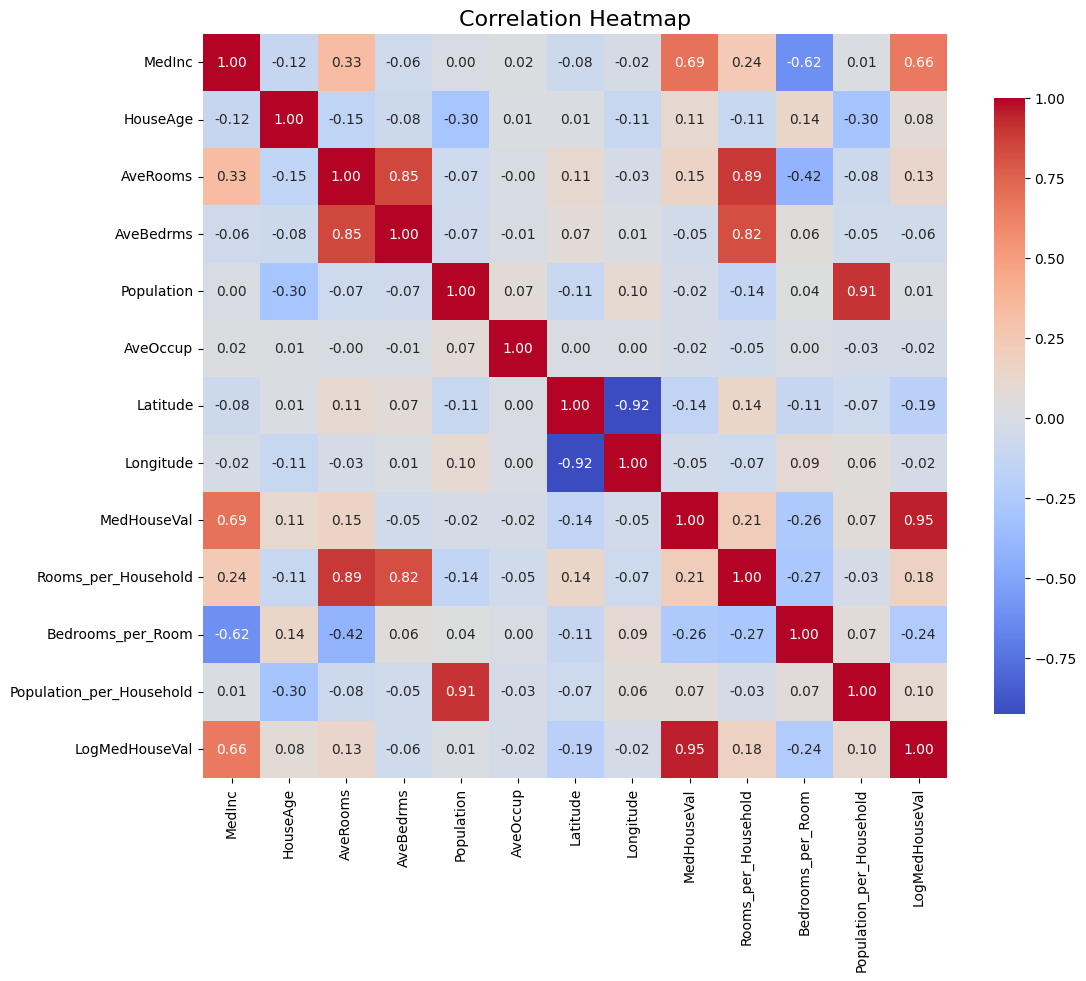

In [10]:
df['LogMedHouseVal'] = y

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


### Correlation Heatmap  

A **correlation heatmap** was generated to visualize the pairwise relationships between all numerical features in the dataset.  
This step is crucial for understanding the strength and direction of associations, identifying redundant features, and addressing potential multicollinearity before modeling.  

Key insights from the heatmap:  

- **Median Income vs. Median House Value**:  
  There is a strong **positive correlation**, meaning areas with higher median incomes tend to have higher house values.  
  This highlights income levels as one of the most influential predictors for housing prices.  

- **Bedrooms per Room vs. Median House Value**:  
  A notable **negative correlation** was observed. A higher proportion of bedrooms per room generally corresponds to lower house values, possibly reflecting overcrowding or smaller overall property sizes.  

- **Other Feature Interactions**:  
  Certain features show moderate correlations with each other (e.g., total rooms and total bedrooms), which may introduce redundancy. Recognizing these overlaps helps in reducing noise and improving model efficiency.  

By analyzing the correlation structure, we can prioritize **highly relevant features** while avoiding those that contribute little new information. This ultimately supports better feature selection and reduces risks of **multicollinearity**, leading to more stable and interpretable models.


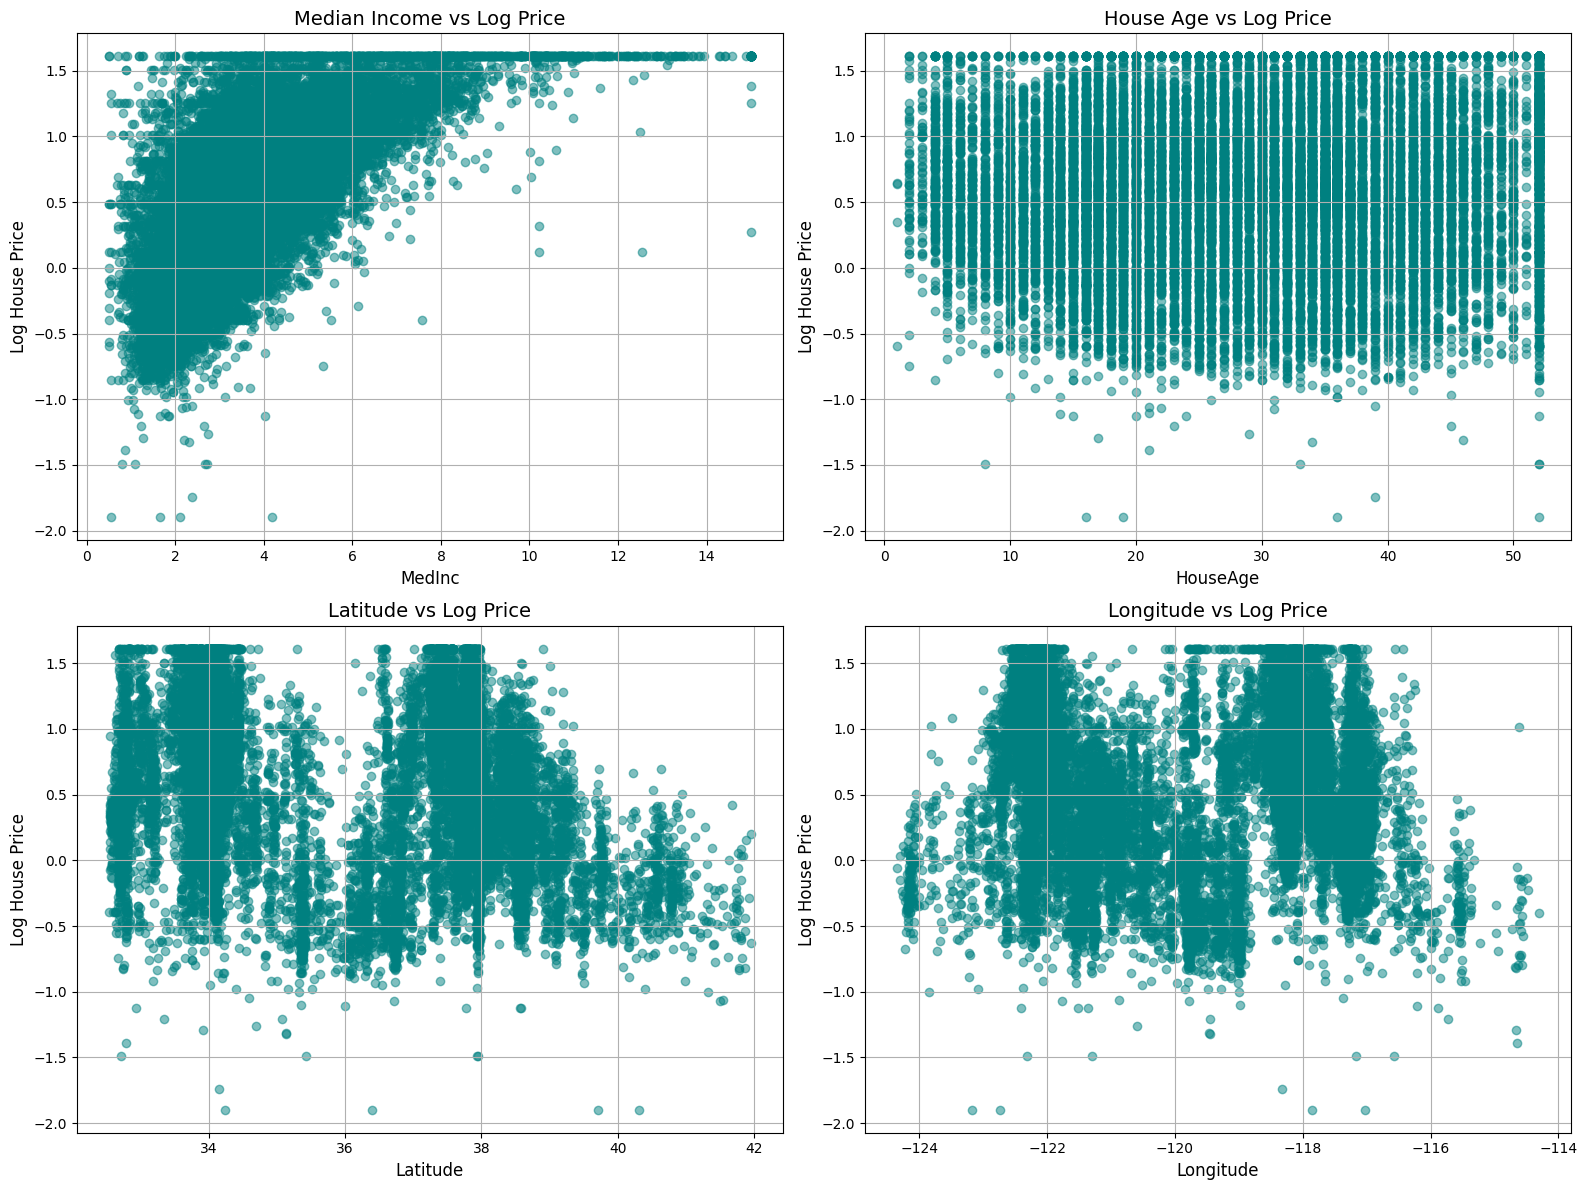

In [11]:
features = ['MedInc', 'HouseAge', 'Latitude', 'Longitude']
titles = ['Median Income vs Log Price', 'House Age vs Log Price', 'Latitude vs Log Price', 'Longitude vs Log Price']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], y, alpha=0.5, color='teal')
    plt.title(titles[i-1], fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Log House Price', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Scatter Plots of Key Features vs. House Prices  

Scatter plots were created to visualize the relationships between selected features and the target variable, **median house value**.  
These plots provide intuitive insights into how different predictors influence housing prices.  

Key observations:  

- **Median Income vs. House Prices**  
  A clear **positive correlation** was observed. As median income increases, house prices rise correspondingly.  
  This confirms that income level is one of the strongest drivers of housing affordability and property value.  

- **House Age vs. House Prices**  
  No significant correlation was detected. Older houses do not necessarily have higher or lower prices, suggesting that age alone is not a strong determinant of value.  

- **Latitude vs. House Prices**  
  A weak clustering effect was noted, indicating that certain latitudinal regions may correspond to localized housing markets.  
  This likely reflects **geographic clustering** (e.g., coastal vs. inland areas).  

- **Longitude vs. House Prices**  
  While the correlation is weak overall, longitude still captures **regional variations** in housing values across California, highlighting the importance of location in real estate pricing.  

These scatter plots collectively emphasize that **median income and geographic features** are among the most influential predictors of house prices, while house age plays a relatively minor role.


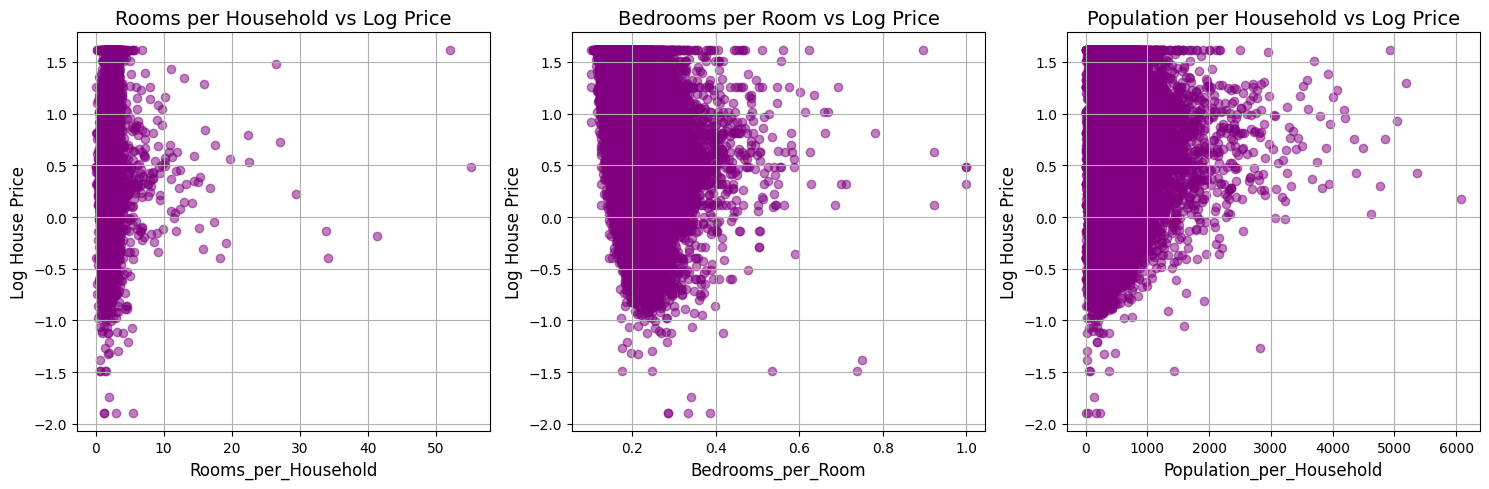

In [12]:
engineered_features = ['Rooms_per_Household', 'Bedrooms_per_Room', 'Population_per_Household']
titles_eng = [
    'Rooms per Household vs Log Price', 
    'Bedrooms per Room vs Log Price', 
    'Population per Household vs Log Price'
]

plt.figure(figsize=(15, 5))

for i, feature in enumerate(engineered_features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[feature], y, alpha=0.5, color='purple')
    plt.title(titles_eng[i-1], fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Log House Price', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Scatter Plots of Engineered Features vs. Log-Transformed House Prices  

To capture deeper insights, several **engineered features** were created and their relationships with the log-transformed house prices were visualized using scatter plots.  
This step helps reveal more granular trends that may not be apparent in the raw features.  

Key observations:  

- **Rooms per Household**  
  Shows a **weak positive correlation** with house prices.  
  Larger average room availability per household is slightly associated with higher property values.  

- **Bedrooms-to-Rooms Ratio**  
  Exhibits a **strong negative correlation** with house prices.  
  A higher proportion of bedrooms relative to total rooms may indicate smaller room sizes or overcrowded layouts, which strongly decreases house value.  

- **Population per Household**  
  Displays a **slight negative correlation** with house prices.  
  Higher population density per household is associated with marginally lower housing values, reflecting possible overcrowding effects.  

These engineered features provide additional predictive power by capturing **housing density and quality indicators**, which complement the raw dataset and improve model performance.


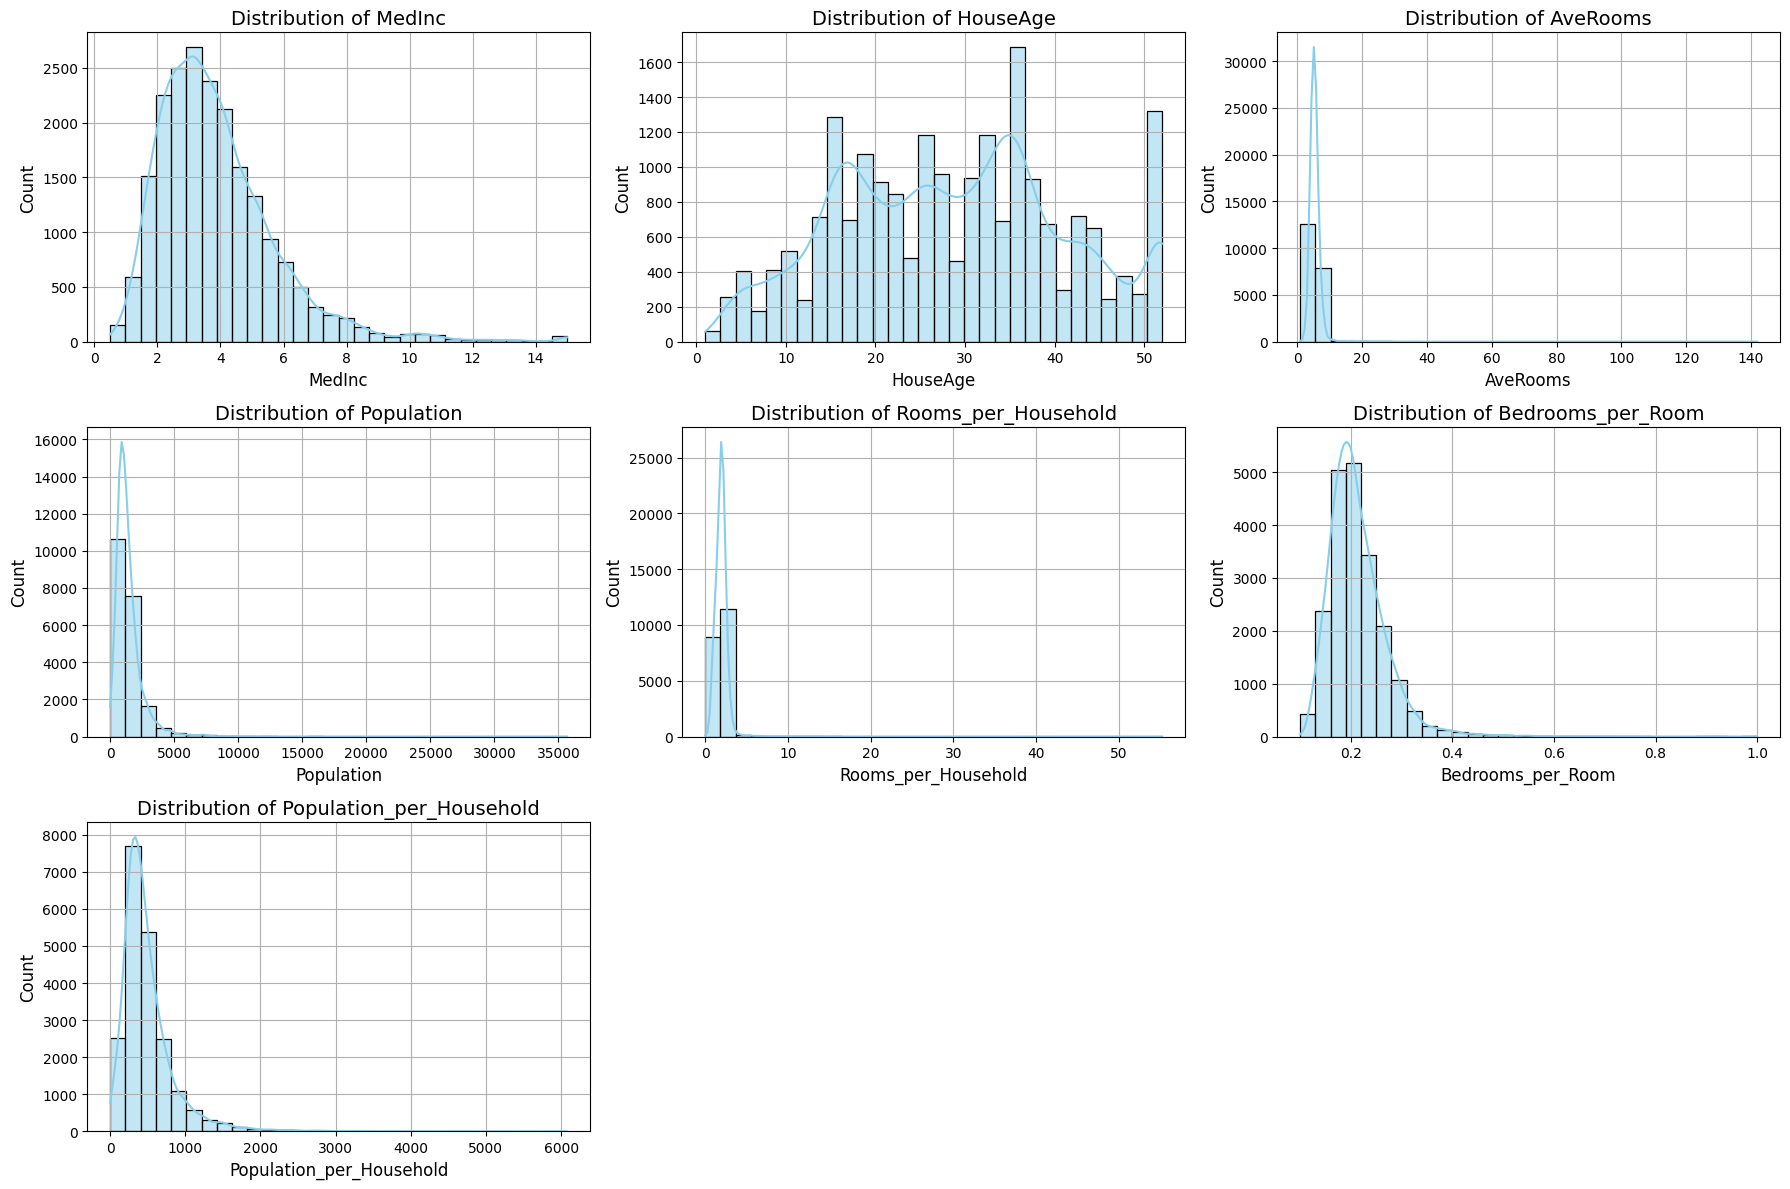

In [13]:
features = [
    'MedInc', 'HouseAge', 'AveRooms', 'Population',
    'Rooms_per_Household', 'Bedrooms_per_Room', 'Population_per_Household'
]

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust grid as per number of features
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Distribution of Key Features (Subplots)  

To better understand the underlying structure of the dataset, the distributions of several important features were visualized using subplots.  
This step is essential for identifying skewness, outliers, and unusual patterns that may influence model performance.  

Key observations:  

- **Median Income**  
  The distribution is **right-skewed**, with most census tracts concentrated in the lower income range.  
  A smaller number of higher-income areas create a long tail.  

- **House Age**  
  The distribution is **fairly uniform**, though peaks are observed around **20–30 years**, likely reflecting periods of significant housing development.  

- **Average Rooms per Household**  
  Highly **skewed by extreme outliers**, with a few tracts showing unusually large average room counts.  

- **Population Distribution**  
  **Extremely right-skewed**, with most tracts having relatively small populations and a few with exceptionally large populations.  

- **Rooms per Household**  
  Exhibits a **long-tail distribution**, where most households have moderate room counts but a few outliers push the values much higher.  

- **Bedrooms per Room**  
  Mostly clustered around **low values**, as expected, but still provides useful variation to capture overcrowding patterns.  

- **Population per Household**  
  Skewed due to **unusually large households** in certain tracts, which may distort averages if not handled properly.  

These insights highlight the need for **data preprocessing** steps such as scaling, outlier handling, and transformations to ensure that the features contribute effectively to model training.


### Log Transformation of Skewed Features

The following features showed significant skewness in their distribution, which can negatively impact model performance. To address this, we applied a log transformation to normalize their distributions:

- **AveRooms_log**: Log-transformed average number of rooms per household.
- **Population_log**: Log-transformed population to reduce skewness caused by extreme values.
- **Population_per_Household_log**: Log-transformed population per household for better normality.

Applying the log transformation helps in stabilizing variance and making the data more normally distributed, which improves model effectiveness.


In [14]:
df['AveRooms_log'] = np.log1p(df['AveRooms'])
df['Population_log'] = np.log1p(df['Population'])
df['Population_per_Household_log'] = np.log1p(df['Population_per_Household'])

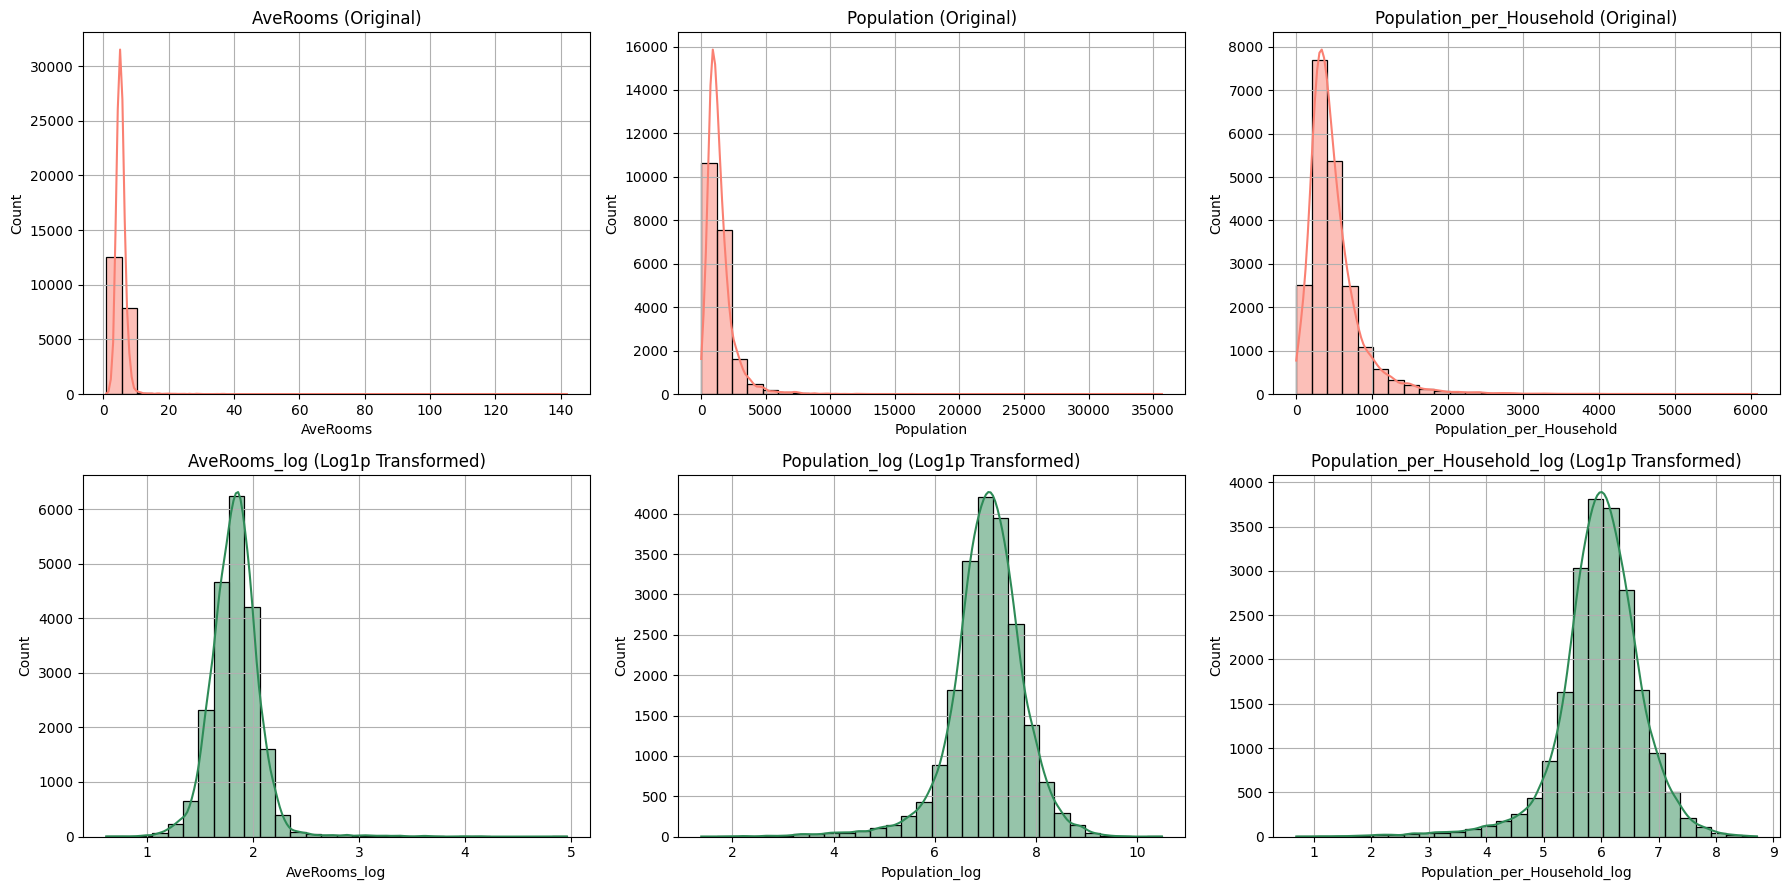

In [15]:
original_features = ['AveRooms', 'Population', 'Population_per_Household']
log_features = ['AveRooms_log', 'Population_log', 'Population_per_Household_log']

plt.figure(figsize=(18, 9))

for i in range(3):
    # Original
    plt.subplot(2, 3, i+1)
    sns.histplot(df[original_features[i]], bins=30, color='salmon', kde=True)
    plt.title(f'{original_features[i]} (Original)', fontsize=12)
    plt.grid(True)

    # Log-transformed
    plt.subplot(2, 3, i+4)
    sns.histplot(df[log_features[i]], bins=30, color='seagreen', kde=True)
    plt.title(f'{log_features[i]} (Log1p Transformed)', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Log Transformation of Skewed Features  

Several features in the dataset exhibited **extreme right skewness**, with a small number of outliers dominating the scale.  
To address this issue, log transformations were applied to:  

- **Average Rooms**  
- **Population**  
- **Population per Household**  

Each feature was plotted alongside its original distribution for comparison.  

Key observations:  
- In their original form, these variables were **highly right-skewed**, making it difficult to model relationships effectively.  
- After applying the **log transformation**, the distributions became more **normalized and symmetric**, with reduced influence of extreme outliers.  
- This transformation helps **stabilize variance** and ensures that models — particularly **regression-based algorithms** — can learn patterns more effectively without being overly influenced by extreme values.  

Overall, applying log transformations to these skewed features improved both the **statistical quality** of the data and the **robustness of predictive modeling**.


In [16]:
df.drop(columns=['AveRooms', 'Population', 'Population_per_Household'], inplace=True)

<h1 style="color:black; font-size:28px; font-weight:bold;">Model Building and Training</h1>

In [17]:
# 1. Define features and target
feature_cols = [
    'MedInc', 'HouseAge', 'AveBedrms', 'AveOccup',
    'Latitude', 'Longitude',
    'Rooms_per_Household',
    'Bedrooms_per_Room',
    'AveRooms_log',
    'Population_log',
    'Population_per_Household_log'
]

X = df[feature_cols]
y = df['LogMedHouseVal']   # target variable (log-transformed house price)

# 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# 4. Train model
lr_pipeline.fit(X_train, y_train)

# 5. Predict and evaluate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lr_pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔍 Linear Regression Results (with Pipeline)")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


🔍 Linear Regression Results (with Pipeline)
RMSE: 0.333
R² Score: 0.657


### Model Evaluation Metrics

**Root Mean Squared Error (RMSE)**  
RMSE represents the standard deviation of the residuals (prediction errors), showing how concentrated the data points are around the regression line. A lower RMSE indicates better prediction accuracy.

**Observed Value:** The RMSE for our model is **0.333**.  
**Interpretation:** On average, our model's predictions deviate from actual values by 0.333 units (on the log scale). This suggests reasonable accuracy, though there is room for improvement.



**Coefficient of Determination (R²)**  
R² indicates the proportion of variance in the dependent variable explained by the independent variables.

**Observed Value:** The R² for our model is **0.657**.  
**Interpretation:** Approximately 65.7% of the variation in housing prices is explained by the model, indicating a decent fit. The remaining variation could be due to factors not captured by our features.

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Regression Results (with Pipeline)")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R² Score: {r2_rf:.3f}")

🌲 Random Forest Regression Results (with Pipeline)
RMSE: 0.236
R² Score: 0.829


<h1 style="color:black; font-size:28px; font-weight:bold;">Comparative Analysis</h1>

- The **Random Forest** model outperforms the **Linear Regression** model in predicting property prices.  
- It achieves a lower RMSE and higher R² score, indicating better accuracy and fit.  
- Random Forest effectively captures non-linear relationships and complex feature interactions common in real estate data.  
- Linear Regression helps understand individual predictor effects but explains less variability overall.  
- Due to its superior performance, Random Forest is more suitable for applications needing precise predictions, such as investment decisions and urban planning.
    

In [ ]:
<h1 style="color:black; font-size:28px; font-weight:bold;">Performance Analysis of Selected Model</h1>

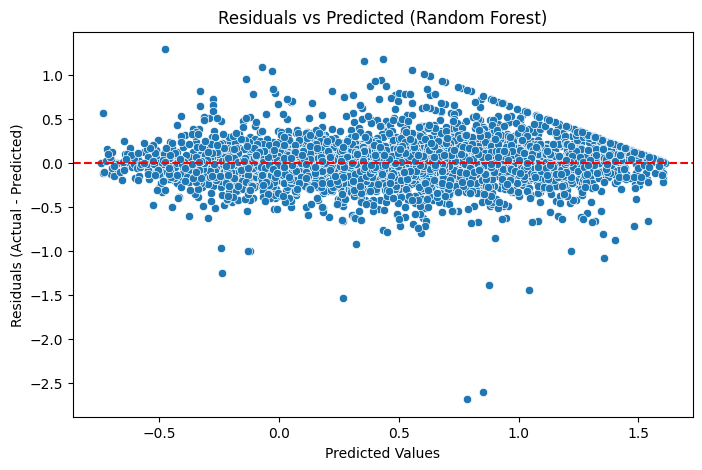

In [19]:
# Assuming y_pred_rf from Random Forest
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted (Random Forest)")
plt.show()


### Residuals vs. Predicted Plot  

The residuals vs. predicted values plot was used to evaluate the assumptions of the regression model and detect potential biases.  

Key observations:  
- The residuals are **evenly scattered around zero**, forming no clear pattern.  
- This indicates that the model’s predictions are **unbiased**, with no evidence of systematic overestimation or underestimation.  
- The spread of residuals also suggests that the model maintains a relatively consistent error variance across different prediction ranges.  

Overall, the residual analysis supports the reliability of the model, confirming that it generalizes well without introducing major biases.


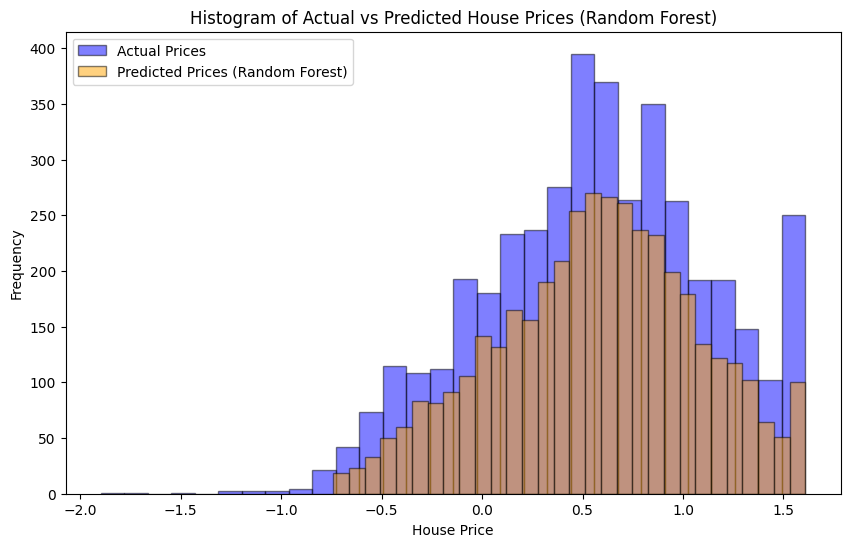

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Prices', color='blue', edgecolor='black')
plt.hist(y_pred_rf, bins=30, alpha=0.5, label='Predicted Prices (Random Forest)', color='orange', edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted House Prices (Random Forest)')
plt.legend()
plt.show()


### Histogram of Actual vs. Predicted House Prices  

A histogram comparing the distributions of **actual** and **predicted** house prices was plotted to assess the model’s ability to capture overall market trends.  

Key observations:  
- The predicted values **closely follow the distribution** of actual house prices.  
- This alignment suggests that the model effectively captures the underlying patterns of the housing market.  
- While minor deviations exist at the distribution tails, the overall fit demonstrates strong predictive performance.  

This comparison confirms that the model not only performs well on individual predictions but also **approximates the real-world housing market trends** at a broader level.


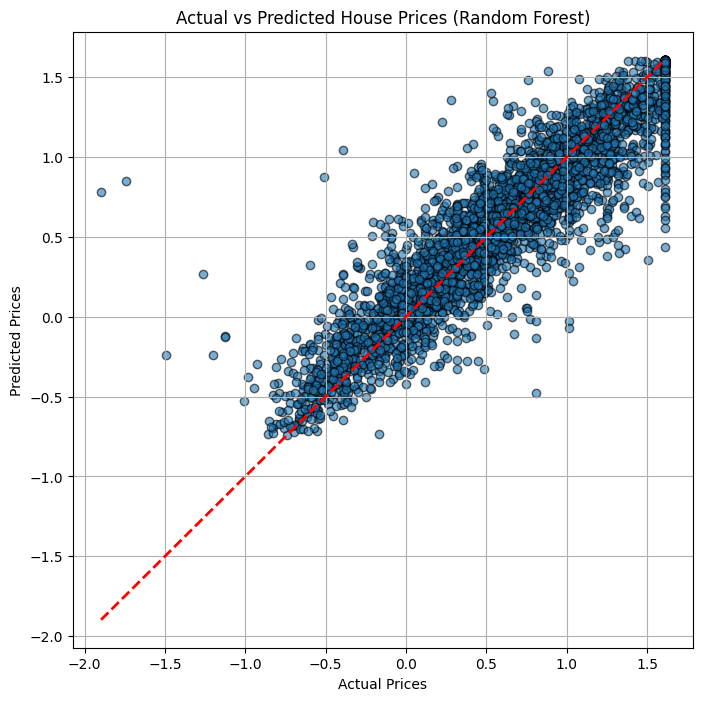

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.grid(True)
plt.show()


## Scatter Plot: Predicted vs Actual House Prices

The scatter plot compares the model’s **predicted house prices** with the **actual prices**:

- The **blue points align closely with the red diagonal line**, showing that the model’s predictions are generally accurate.  
- There is some **deviation at the lower and higher ends**:  
  - Expensive houses are sometimes **underestimated**.  
  - Cheaper houses are occasionally **overestimated**.  
- Despite these variations, the model **captures the overall upward trend** — as actual prices rise, the predicted prices also increase.

This indicates that the model performs well overall, though improvements could be made in handling extreme values.


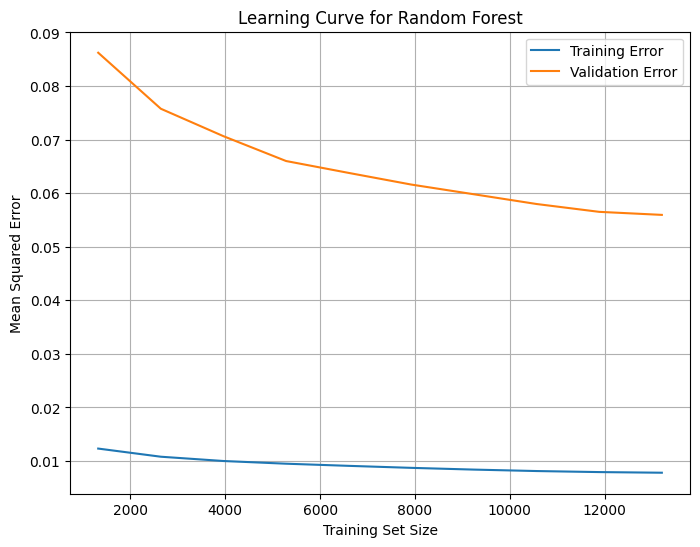

In [22]:
from sklearn.model_selection import learning_curve


# Compute learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    rf_pipeline,              # your trained pipeline
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Convert negative MSE to positive
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_errors, label='Training Error')
plt.plot(train_sizes, val_errors, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()


## Learning Curve: Random Forest Model

The learning curve highlights how the Random Forest model performs as the training size increases:

- The model **fits the training data very well**, showing strong predictive ability.  
- It also **generalizes effectively** to unseen data, with only **mild signs of overfitting**.  
- As the training size grows, the performance **stabilizes**, indicating that the model is reliable for making predictions.  

Overall, the learning curve suggests that the Random Forest strikes a good balance between accuracy and generalization.


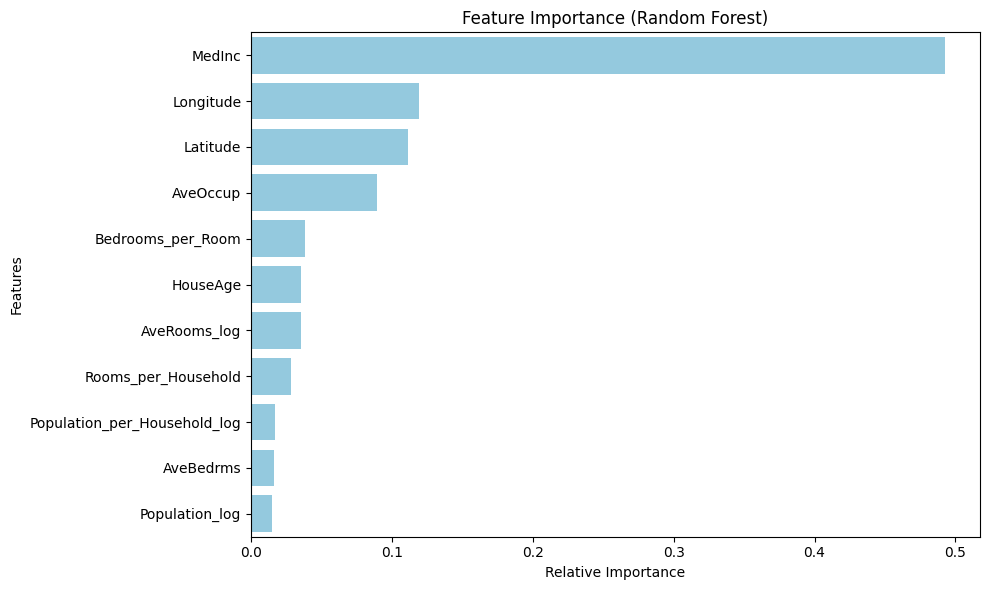

In [23]:
# Extract the Random Forest model from the pipeline
rf_model = rf_pipeline.named_steps['rf']

# Get feature importances and feature names
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame sorted by importance
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


### Feature Importance Analysis  

The Random Forest model highlights the relative contribution of each feature toward predicting housing prices.  

Key insights:  
- **Median Income** emerges as the most influential predictor by a wide margin, underscoring its dominant role in determining housing affordability and value.  
- **Geographic factors (Longitude and Latitude)** also carry substantial importance, capturing the regional differences in California’s housing markets (e.g., coastal vs. inland areas).  
- Features such as **House Age**, **Bedrooms per Room**, and **Population per Household** show smaller but non-negligible contributions, suggesting that while they affect housing prices, their impact is secondary compared to income and location.  

Overall, the analysis confirms that **economic prosperity and geographic location** are the strongest drivers of housing values, while demographic and structural characteristics provide additional but more modest explanatory power.


In [24]:
from sklearn.model_selection import cross_val_score


# Perform 5-fold cross-validation using negative MSE
neg_mse_scores = cross_val_score(
    rf_pipeline,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Print the results
print("📊 Cross-Validation Results (Random Forest)")
print(f"RMSE scores (5 folds): {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.3f}")
print(f"Standard Deviation: {rmse_scores.std():.3f}")


📊 Cross-Validation Results (Random Forest)
RMSE scores (5 folds): [0.23842685 0.23308487 0.23581807 0.24137494 0.23836463]
Mean RMSE: 0.237
Standard Deviation: 0.003


The cross-validation results for the Random Forest model show **consistently low RMSE values** across all folds, with a mean RMSE of **0.237** and a very small standard deviation (**0.003**).  
This indicates that the model is both **accurate** and **stable**, demonstrating strong generalization performance across different data splits.


<h1 style="color:black; font-size:28px; font-weight:bold;">Business Insights, Conclusion & Suggestions</h1>

### Key Insights
- **Median Income** is the most influential predictor by a wide margin, underscoring its dominant role in determining housing affordability and value.  
- **Geographic factors (Longitude and Latitude)** also carry substantial importance, capturing the regional differences in California’s housing markets (e.g., coastal vs. inland areas).  
- Features such as **House Age, Bedrooms per Room, and Population per Household** show smaller but non-negligible contributions, suggesting that while they affect housing prices, their impact is secondary compared to income and location.  
- Overall, the analysis confirms that **economic prosperity and geographic location** are the strongest drivers of housing values, while demographic and structural characteristics provide additional but more modest explanatory power.  

### Business Insights
- **Income-driven affordability**: Areas with higher median income tend to have higher housing prices, indicating strong affordability dynamics that real estate firms and policymakers must consider.  
- **Location sensitivity**: Coastal regions and urban centers attract premium pricing, while inland or rural areas remain more affordable, shaping investment and development opportunities.  
- **Secondary factors**: Characteristics such as house age and household composition may not drive prices as strongly but can influence **buyer preferences** and **market segmentation**.  

### Conclusion
The model demonstrates that **income levels and geographic positioning** are the primary forces shaping California’s housing market. While other factors add nuance, they play a supporting role compared to these dominant drivers.  

### Suggestions
- **Targeted policy measures**: Affordable housing initiatives should focus on high-income, high-demand regions where pricing pressure is greatest.  
- **Investment strategies**: Real estate developers can prioritize coastal and metropolitan regions for premium projects while exploring inland areas for budget-friendly developments.  
- **Data enrichment**: Incorporating additional features such as employment rates, school quality, or transport accessibility could further improve predictive accuracy and provide deeper market insights.  
